### Importing Packages

In [1]:
import numpy as np
import pandas as pd
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

### Load Dataset & Insights

In [2]:
# Load dataset
df = pd.read_csv("co2_emissions_from_agri_cleaned.csv", delimiter=";")
df.drop(columns=["Unnamed: 31"], inplace=True)
df.head()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_CO2,Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On_farm_energy_use,Rural_population,Urban_population,Total_Population_Male,Total_Population_Female,total_emission,Average_Temperature_C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,141.0963,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,141.0963,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,141.0963,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,141.0963,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,141.0963,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
# Display the number of rows and columns
df.shape

(6965, 31)

In [4]:
## Display summary information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   object 
 2   Savanna_fires                    6965 non-null   float64
 3   Forest_fires                     6965 non-null   float64
 4   Crop_Residues                    6965 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_CO2        6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6965 non-null   float64
 10  Net_Forest_conversion            6965 non-null   float64
 11  Food_Household_Consumption       6965 non-null   float64
 12  Food_Retail         

### Random Forest Regressor

In [5]:
# Define target and features
target = "Average_Temperature_C"
features = df.drop(columns=[target]).columns

#Split Numerical and Categorical Columns
numeric_features = df[features].select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df[features].select_dtypes(include=["object"]).columns.tolist()

#Preprocessing Pipelines
numeric_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_preprocess, numeric_features),
    ("cat", categorical_preprocess, categorical_features)
])


In [6]:
#Train-Test Split
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Build and Train the Model
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
#Evaluate the Model

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9977012441471426
RMSE: 7819.127734717182


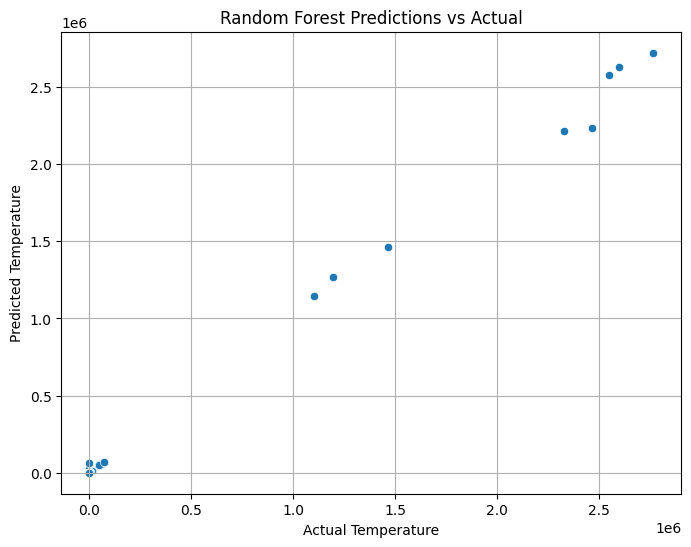

In [9]:
#Visualize Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Random Forest Predictions vs Actual")
plt.grid(True)
plt.show()


### Linear Regression Model

In [10]:
#Linear Regression
from sklearn.linear_model import LinearRegression

# Define the pipeline with Linear Regression
linear_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

# Fit the model
linear_model.fit(X_train, y_train)

# Predict
y_pred_lr = linear_model.predict(X_test)

# Evaluate
print("R² Score (Linear Regression):", r2_score(y_test, y_pred_lr))
print("RMSE (Linear Regression):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

R² Score (Linear Regression): 0.9976452681887181
RMSE (Linear Regression): 7913.7551540507375


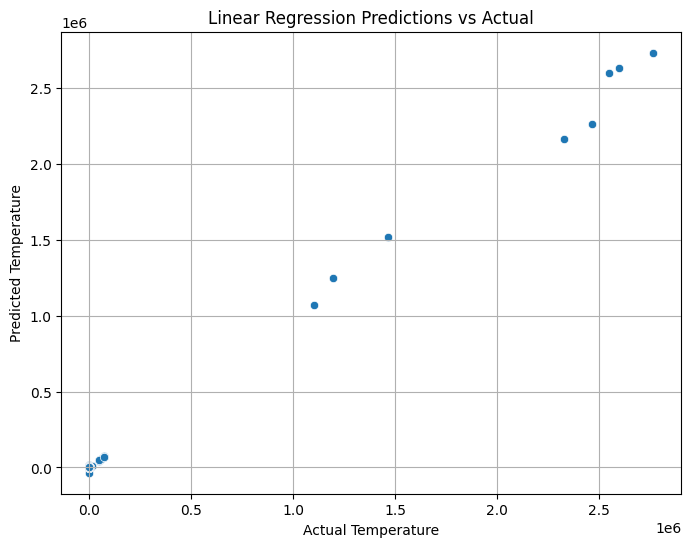

In [11]:
#Visualize prediction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Linear Regression Predictions vs Actual")
plt.grid(True)
plt.show()

### Ridge Regression 

In [12]:
#Ridge Regression (L2 Regularization)

from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", Ridge(alpha=1.0))  # You can tune alpha
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("R² Score (Ridge):", r2_score(y_test, y_pred_ridge))
print("RMSE (Ridge):", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


R² Score (Ridge): 0.997651765145966
RMSE (Ridge): 7902.830164043607


### Lasso Regression

In [13]:
#Lasso Regression (L1 Regularization)

from sklearn.linear_model import Lasso

lasso_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", Lasso(alpha=0.1))  # Smaller alpha for less aggressive shrinkage
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("R² Score (Lasso):", r2_score(y_test, y_pred_lasso))
print("RMSE (Lasso):", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

R² Score (Lasso): 0.9975508000102536
RMSE (Lasso): 8070.937948916573


C:\Users\Admin\anaconda3\envs\creating_an_environment\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.902e+10, tolerance: 8.310e+09
  model = cd_fast.sparse_enet_coordinate_descent(


### Compare All Models Visually


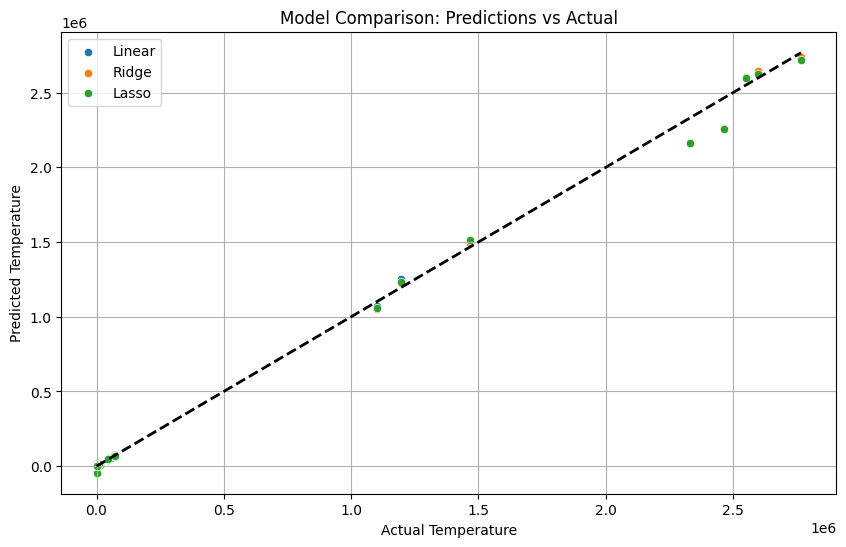

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, label="Linear")
sns.scatterplot(x=y_test, y=y_pred_ridge, label="Ridge")
sns.scatterplot(x=y_test, y=y_pred_lasso, label="Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Model Comparison: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()

### Visualize Coefficients (Linear, Ridge, Lasso)

In [15]:
#Extract Transformed Feature Names
# Get feature names after preprocessing

feature_names = preprocessor.get_feature_names_out()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6028\1197781031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coefficient", y="feature", data=top_features, palette="viridis")


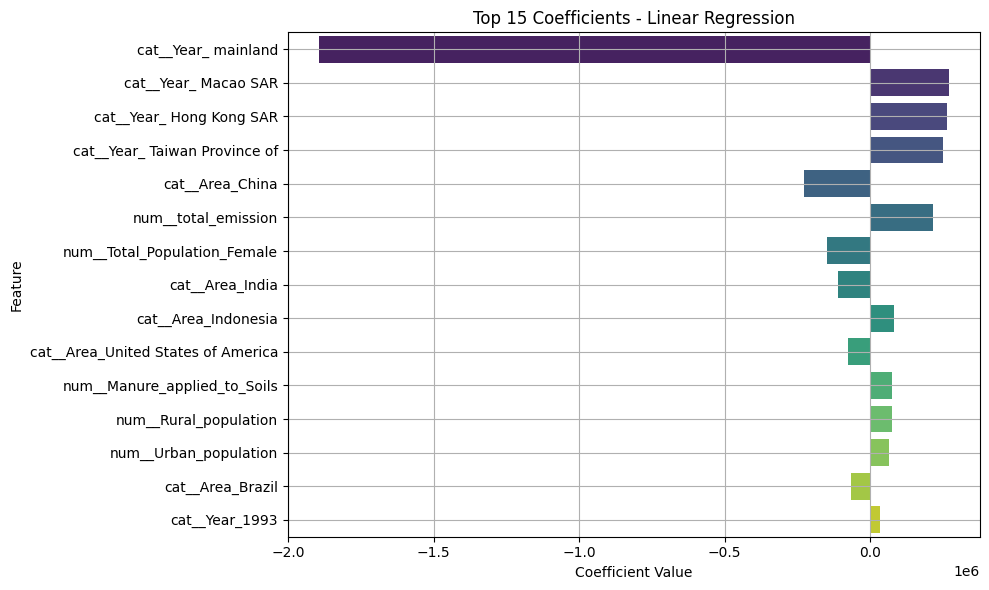

C:\Users\Admin\AppData\Local\Temp\ipykernel_6028\1197781031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coefficient", y="feature", data=top_features, palette="viridis")


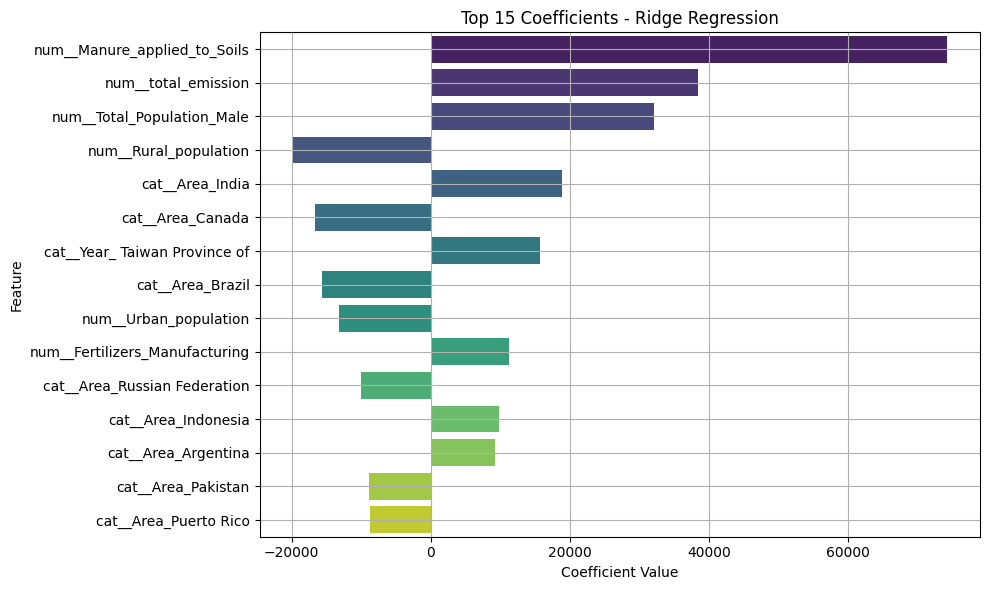

C:\Users\Admin\AppData\Local\Temp\ipykernel_6028\1197781031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coefficient", y="feature", data=top_features, palette="viridis")


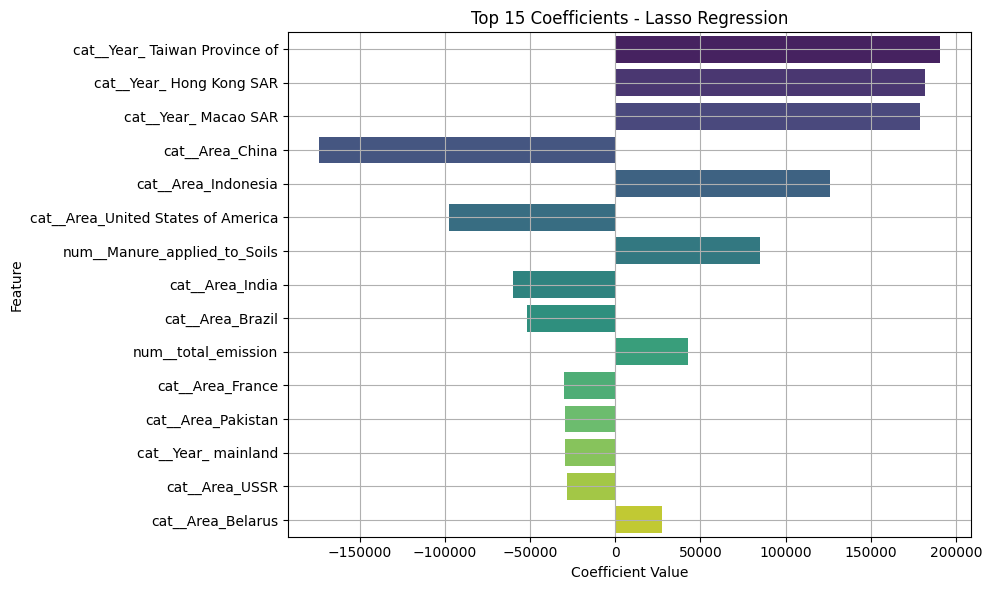

In [16]:
#Plot Coefficients for Each Mode

def plot_top_coefficients(model, title, top_n=15):
    coefs = model.named_steps["regressor"].coef_
    feature_names = preprocessor.get_feature_names_out()
    
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coefficient": coefs
    })
    coef_df["abs_coef"] = coef_df["coefficient"].abs()
    top_features = coef_df.sort_values("abs_coef", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="coefficient", y="feature", data=top_features, palette="viridis")
    plt.title(f"Top {top_n} Coefficients - {title}")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_top_coefficients(linear_model, "Linear Regression")
plot_top_coefficients(ridge_model, "Ridge Regression")
plot_top_coefficients(lasso_model, "Lasso Regression")
